# extração do texto do PDF

## inglês

In [1]:
import PyPDF2
import nltk

from nltk.corpus import stopwords

In [46]:
#Listagem de palavras frequentes que não alteram o significado do texto (em ingles)
nltk.download('stopwords')
irrelevantes = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alvaro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
#tratamento de flexão de palavras por lematização
tk = nltk.tokenize.WhitespaceTokenizer()
nltk.download('wordnet')
nltk.download('omw-1.4')
lmt = nltk.stem.WordNetLemmatizer()

#A biblioteca nltk não tem dados para lematização em PT
def lematize_text(text):
    lem_words = list()
    for word in tk.tokenize(text):
        lem_words.append(lmt.lemmatize(word))
    return lem_words


[nltk_data] Downloading package wordnet to /Users/alvaro/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/alvaro/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [48]:
reader = PyPDF2.PdfReader('ArquivosEN/1608.06902.pdf')

In [49]:
len(reader.pages)

11

In [50]:
textin = reader.pages[0].extract_text()

In [51]:
lematizedTXT = lematize_text(textin)
print(len(lematizedTXT))

541


In [53]:
#Removendo elementos ruins - função bem custosa, deve ter alguma que faz isso mais facil
for word in lematizedTXT:
    for stopword in irrelevantes:
        if word == stopword:
            lematizedTXT.remove(word)


In [54]:
#Deu certo, mas ainda tem palavras que precisariam ser tratadas
print(len(lematizedTXT))
print(lematizedTXT)

380
['Recurrent', 'Neural', 'Networks', 'With', 'Limited', 'Numerical', 'Precision', 'Joachim', 'Ott\x03,', 'Zhouhan', 'Linz,Ying', 'Zhangz,', 'Shih-Chii', 'Liu\x03,', 'Yoshua', 'Bengiozy', '\x03Institute', 'Neuroinformatics,', 'University', 'Zurich', 'ETH', 'Zurich', 'ottj@ethz.ch,', 'shih@ini.ethz.ch', 'zDépartement', 'd’informatique', 'et', 'de', 'recherche', 'opérationnelle,', 'Université', 'de', 'Montréal', 'yCIFAR', 'Senior', 'Fellow', '{zhouhan.lin,', 'ying.zhang}@umontreal.ca', 'Abstract', 'Recurrent', 'Neural', 'Networks', '(RNNs)', 'produce', 'state-of-art', 'performance', 'many', 'machine', 'learning', 'task', 'demand', 'resource', 'term', 'memory', 'computational', 'power', 'often', 'high.', 'Therefore,', 'great', 'interest', 'optimizing', 'computation', 'performed', 'model', 'especially', 'considering', 'development', 'specialized', 'low-power', 'hardware', 'deep', 'networks.', 'One', 'way', 'reducing', 'computational', 'need', 'limit', 'numerical', 'precision', 'network',

In [ ]:
#Existem caracteres estranhos (Ott\x03,)
#Verificar pontuação, ela pode não ser tão importante
#Existem alguns trechos em espanhol(?)
#Palavras compostas como low-precision
#1arXiv:1608.06902v2 (?)

## Português

In [68]:
import PyPDF2

import nltk
from nltk.corpus import wordnet, stopwords
from nltk.stem import RSLPStemmer

import string

import matplotlib.pyplot as plt

from collections import Counter

from wordcloud import WordCloud

In [69]:
# importa dados que vamos usar 
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('floresta')   # conjunto de textos em português anotados com etiquetas morfossintáticas
nltk.download('stopwords')
nltk.download('rslp')

[nltk_data] Downloading package punkt to /Users/alvaro/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/alvaro/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package floresta to /Users/alvaro/nltk_data...
[nltk_data]   Package floresta is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alvaro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /Users/alvaro/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

### remover número da página

In [70]:
def removerNumeroPagina(pagina :str) -> str:
    if pagina[3:5].isdigit():
        pagina = pagina[5:]
        
    return pagina

### Extrair texto do PDF

In [71]:
def lerPDF(arquivo :str) -> str:
    artigo = PyPDF2.PdfReader(arquivo)
    texto = ''
    for pagina in artigo.pages:
        texto += removerNumeroPagina(pagina.extract_text())

    return texto

### remover pontuação

In [72]:
def removerPontuacao(texto :str) -> str:
    return "".join(caractere for caractere in texto if caractere not in string.punctuation)

### Lamatizar artigo

In [73]:
def lamatizarPalavra(palavra :str) -> str:
    stemmer = RSLPStemmer()     # Removedor de Sufixos da Língua Portuguesa
    lemma = stemmer.stem(palavra)
    if lemma == palavra:
        synsets = wordnet.synsets(palavra, lang='por')
        if synsets:
            lemma = synsets[0].lemmas()[0].name()
    return lemma

In [74]:
def lamatizarTexto(texto :str) -> str:
    palavras = texto.split()
    stopwordsPT = stopwords.words('portuguese')
    textoLematizado = [lamatizarPalavra(palavra.lower()) for palavra in palavras if palavra.lower() not in stopwordsPT]
    textoLematizado = ' '.join(textoLematizado)
    return textoLematizado

### Identificar referências

In [11]:
# TODO melhorar isso aqui
pagina = artigo.pages[35].extract_text() + artigo.pages[36].extract_text()

In [75]:
def extrairReferencias(pagina :str) -> list:
    referencias = pagina.split(' REFERÊNCIAS  \n')[1]
    referencias = referencias.split('.  \n')

    referencias = [referencia.replace('\n', '') for referencia in referencias]
    return referencias

In [76]:
extrairReferencias(pagina)

['ARAÚJO , Flávio H. D. ; CARNEIRO , Allan C. ; SILVA , Romuere R. V. ; MEDEIROS , Fátima N. S. ; USHIZIMA , Daniela M.  Redes Neurais Convolucionais com Tensorﬂow: Teoria e Prática . III Escola Regional de Informática do Piauí. Livro Anais - Artigos e Minicursos, v. 1, n. 1,  p. 382 -406, jun, 2017.  Disponível em:  http://www.eripi.com.br/2017/images/anais/minicursos/7.pdf . Acesso em: 1 5 out. 2018',
 'BARCA , Maria Carolina Stockler ; SILVEIRA , Tiago Redondo de Siqueira ; MAGINI , Marcio . TREINAMENTO DE REDES NEURAIS ARTIFICIAIS: O ALGORITMO  BACKPROPAGATION . In: IX Encontro Latino Americano de Iniciação Científica e V Encontro Latino Americano de Pós -graduação, Universidade do Vale do Paraíba. Vale do Paraíba: Univap; 200 5. p. 46-49. Disponível em:  http://www.inicepg.u nivap.br/cd/INIC_2005/inic/IC1%20anais/IC1 -17.pdf . Acesso em: 12 out. 2018',
 'DPL, Deep Learning Book. Capítulo 23 – Como Funciona o Dropout? . Disponível em:  http://deeplearningbook.com.br/capitulo -23-co

### Processar texto

In [77]:
def preProcessamento(arquivo :str) -> str:
    textoPreProcessado = lerPDF(arquivo)
    # textoPreProcessado = extrairReferencias(artigo.pages[35].extract_text() + artigo.pages[36].extract_text())
    textoPreProcessado = removerPontuacao(textoPreProcessado)
    textoPreProcessado = lamatizarTexto(textoPreProcessado)
   
    return textoPreProcessado

In [78]:
preProcessamento('ArquivosPT/DAR20052019.pdf')

'deep learning red neur convoluc reconhec automá caract plac licenc automo dieg alv rodrig centr informá univers feder paraíb joã pesso 2018 dieg alv rodrig deep learning red neur convoluc reconhec automá caract plac licenc automo monograf apresent curs ciênc comput centr informá univers feder paraíb requisit obtenç degree gasbag ciênc comput orient prof dr leonard vidal batist novembr 2018 agradec gost registr agradec pal pedr iren suport dad períod gradu esp elain paci apoi dur períod dificuldad agradec espec orient prof dr leonard vidal batist orient compreens long dess jorn agradec coleg profes long ano pres time time auxili colabor and curs amig apoi form diret indiret gradu resum control tráfeg rodovi via públic priv fronteir estac determin estacion infring lei trânsit exempl taref exig identific veicul identific feit mei plac licenciament automo regul lei específ process identific plac necess wear algum técn vis computac camp ganh bast atenç comunidad científ empr long últ form 

### contagem dos termos do artigo

In [8]:
def contagemTermos(texto :str) -> dict:
    palavras = texto.split()
    return Counter(palavras)

In [9]:
def nuvemPalavras(texto :str, quantidadePalavras: int) -> None:
    contagemPalavras = contagemTermos(texto)

    palavras = dict(contagemPalavras.most_common(quantidadePalavras))

    nuvem_palavras = WordCloud()
    nuvem_palavras.generate_from_frequencies(palavras)

    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [10]:
contagemPalavras = contagemTermos(artigoPreProcessado)
contagemPalavras.most_common(10)

[('red', 51),
 ('imag', 43),
 ('plac', 42),
 ('neur', 35),
 ('process', 34),
 ('figur', 34),
 ('funç', 32),
 ('cam', 32),
 ('exempl', 30),
 ('dad', 29)]

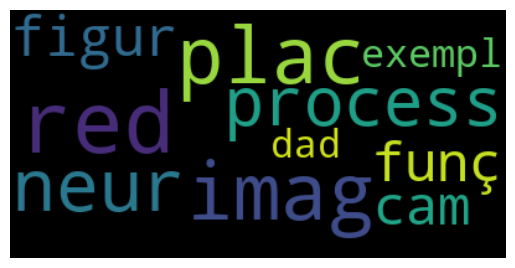

In [11]:
nuvemPalavras(artigoPreProcessado, 10)

### Identificar objetivo

In [14]:
artigo.pages[14].extract_text()

' \n 15 Aplicar o modelo de CNNs  para resolver o problema do reconhecimento \nautomático de placas de licenciamento surge como opção possivelmente viável as \ntradicionais técni cas de visão computacional e aprendizado de máquina existentes, e já \nutilizadas comercialmente, para resolver esse problema em específico.  \n1.1 Tema  \nEste trabalho tem por tema, como o título sugere, o Deep Learning  com \nênfase no uso das CNNs  para resolver o pro blema do reconhecimento de caracteres em \nplacas veiculares. Tendo como hipótese a possibilidade de se resolver o problema \napenas com o uso de uma CNN , removendo -se a etapa de segmentação dos caracteres, \ncomum para sistemas que buscam resolver o problema . \n1.1.1 Objetivo geral  \nDemonstrar a viabilidade da resolução do problema de reconhecimento de \nplacas de licenciamento veiculares utilizando apenas uma CNN . \n1.1.2 Objetivos específicos  \n• Criar uma base de dados com placas de licenciamento veiculares \nbrasileiras ; \n• Dese

In [30]:
print(artigo.pages[14].extract_text())

 
 15 Aplicar o modelo de CNNs  para resolver o problema do reconhecimento 
automático de placas de licenciamento surge como opção possivelmente viável as 
tradicionais técni cas de visão computacional e aprendizado de máquina existentes, e já 
utilizadas comercialmente, para resolver esse problema em específico.  
1.1 Tema  
Este trabalho tem por tema, como o título sugere, o Deep Learning  com 
ênfase no uso das CNNs  para resolver o pro blema do reconhecimento de caracteres em 
placas veiculares. Tendo como hipótese a possibilidade de se resolver o problema 
apenas com o uso de uma CNN , removendo -se a etapa de segmentação dos caracteres, 
comum para sistemas que buscam resolver o problema . 
1.1.1 Objetivo geral  
Demonstrar a viabilidade da resolução do problema de reconhecimento de 
placas de licenciamento veiculares utilizando apenas uma CNN . 
1.1.2 Objetivos específicos  
• Criar uma base de dados com placas de licenciamento veiculares 
brasileiras ; 
• Desenvolver uma CNN pa

In [23]:
artigo.pages[10]

{'/Type': '/Page',
 '/Parent': {'/Type': '/Pages',
  '/Count': 37,
  '/Kids': [IndirectObject(3, 0, 140386117728624),
   IndirectObject(17, 0, 140386117728624),
   IndirectObject(19, 0, 140386117728624),
   IndirectObject(21, 0, 140386117728624),
   IndirectObject(23, 0, 140386117728624),
   IndirectObject(27, 0, 140386117728624),
   IndirectObject(31, 0, 140386117728624),
   IndirectObject(35, 0, 140386117728624),
   IndirectObject(37, 0, 140386117728624),
   IndirectObject(39, 0, 140386117728624),
   IndirectObject(42, 0, 140386117728624),
   IndirectObject(43, 0, 140386117728624),
   IndirectObject(44, 0, 140386117728624),
   IndirectObject(45, 0, 140386117728624),
   IndirectObject(46, 0, 140386117728624),
   IndirectObject(47, 0, 140386117728624),
   IndirectObject(48, 0, 140386117728624),
   IndirectObject(49, 0, 140386117728624),
   IndirectObject(51, 0, 140386117728624),
   IndirectObject(54, 0, 140386117728624),
   IndirectObject(56, 0, 140386117728624),
   IndirectObject(58, 

# TExte

In [92]:
artigo = PyPDF2.PdfReader('ArquivosPT/DAR20052019.pdf')

In [93]:
'referências' in artigo.pages[35].extract_text()[:20].lower()

True

In [100]:
artigo.pages[14].extract_text()

' \n 15 Aplicar o modelo de CNNs  para resolver o problema do reconhecimento \nautomático de placas de licenciamento surge como opção possivelmente viável as \ntradicionais técni cas de visão computacional e aprendizado de máquina existentes, e já \nutilizadas comercialmente, para resolver esse problema em específico.  \n1.1 Tema  \nEste trabalho tem por tema, como o título sugere, o Deep Learning  com \nênfase no uso das CNNs  para resolver o pro blema do reconhecimento de caracteres em \nplacas veiculares. Tendo como hipótese a possibilidade de se resolver o problema \napenas com o uso de uma CNN , removendo -se a etapa de segmentação dos caracteres, \ncomum para sistemas que buscam resolver o problema . \n1.1.1 Objetivo geral  \nDemonstrar a viabilidade da resolução do problema de reconhecimento de \nplacas de licenciamento veiculares utilizando apenas uma CNN . \n1.1.2 Objetivos específicos  \n• Criar uma base de dados com placas de licenciamento veiculares \nbrasileiras ; \n• Dese

In [110]:
referencia = ''
objetivo = ''

for art in artigo.pages:
    if 'referências' in art.extract_text().lower():
        referencia = art.extract_text()
    elif 'objetivo geral  \n' in art.extract_text().lower():
        objetivo = art.extract_text()

In [111]:
print(referencia)

 
 36 REFERÊNCIAS  
ARAÚJO , Flávio H. D. ; CARNEIRO , Allan C. ; SILVA , Romuere R. V. ; MEDEIROS , Fátima 
N. S. ; USHIZIMA , Daniela M.  Redes Neurais Convolucionais com Tensorﬂow: Teoria e 
Prática . III Escola Regional de Informática do Piauí. Livro Anais - Artigos e Minicursos, v. 1, 
n. 1,  p. 382 -406, jun, 2017.  Disponível em:  
http://www.eripi.com.br/2017/images/anais/minicursos/7.pdf . Acesso em: 1 5 out. 2018.  
BARCA , Maria Carolina Stockler ; SILVEIRA , Tiago Redondo de Siqueira ; MAGINI , Marcio . 
TREINAMENTO DE REDES NEURAIS ARTIFICIAIS: O ALGORITMO  
BACKPROPAGATION . In: IX Encontro Latino Americano de Iniciação Científica e V 
Encontro Latino Americano de Pós -graduação, Universidade do Vale do Paraíba. Vale do 
Paraíba: Univap; 200 5. p. 46-49. Disponível em:  
http://www.inicepg.u nivap.br/cd/INIC_2005/inic/IC1%20anais/IC1 -17.pdf . Acesso em: 12 
out. 2018.  
DPL, Deep Learning Book. Capítulo 23 – Como Funciona o Dropout? . Disponível em:  
http://deeplearning

In [112]:
print(objetivo)

 
 15 Aplicar o modelo de CNNs  para resolver o problema do reconhecimento 
automático de placas de licenciamento surge como opção possivelmente viável as 
tradicionais técni cas de visão computacional e aprendizado de máquina existentes, e já 
utilizadas comercialmente, para resolver esse problema em específico.  
1.1 Tema  
Este trabalho tem por tema, como o título sugere, o Deep Learning  com 
ênfase no uso das CNNs  para resolver o pro blema do reconhecimento de caracteres em 
placas veiculares. Tendo como hipótese a possibilidade de se resolver o problema 
apenas com o uso de uma CNN , removendo -se a etapa de segmentação dos caracteres, 
comum para sistemas que buscam resolver o problema . 
1.1.1 Objetivo geral  
Demonstrar a viabilidade da resolução do problema de reconhecimento de 
placas de licenciamento veiculares utilizando apenas uma CNN . 
1.1.2 Objetivos específicos  
• Criar uma base de dados com placas de licenciamento veiculares 
brasileiras ; 
• Desenvolver uma CNN pa

In [96]:
for art in artigo.pages:
    print(art.extract_text())

 
 
 
 
 
 
 
 
DEEP LEARNING E REDES NEURAIS 
CONVOLUCIONAIS: RECONHECIMENTO 
AUTOMÁTICO DE CARACTERES EM 
PLACAS DE LICENCIAMENTO 
AUTOMOTIVO  
 
 
 
Diego Alves Rodrigues  
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
CENTRO DE INFORMÁTICA  
UNIVERSIDADE FEDERAL DA PARAÍBA  
 
 
 
 
 
João Pessoa, 2018  

 
 
  
 
 
 
Diego Alves Rodrigues  
 
 
 
 
 
 
 
 
 
 
DEEP LEARNING E REDES NEURAIS 
CONVOLUCIONAIS: RECONHECIMENTO 
AUTOMÁTICO DE CARACTERES EM PLACAS DE 
LICENCIAMENTO AUTOMOTIVO.  
 
 
 
 
 
 
Monografia apresentada ao curso de Ciência da 
Computação  do Centro de Informática, da 
Universidade Federal da Paraíba, como requisito 
para a obtenção do grau de Bacharel em Ciência 
da Computação.  
 
Orientador: Prof.  Dr. Leonardo Vidal Batista  
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
Novembro  de 2018  
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 

 
 
 

 
 
AGRADECIMENTOS  
Gostaria de registrar o agradecimento  aos meus pais, Pedro e Irene, pel

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Criação do vetor de frequência
vectorizer = CountVectorizer()
freq = vectorizer.fit_transform(filtered_tokens)

# Criação do dataframe de frequência
df_freq = pd.DataFrame(freq.toarray(), columns=vectorizer.get_feature_names())

# Extração dos objetivos e problemas
objetivos = df_freq.loc[:, ['objetivo', 'objetivos']].sum().sum()
problemas = df_freq.loc[:, ['problema', 'problemas']].sum().sum()
